<a href="https://colab.research.google.com/github/Amritbhardwajgsv/machine-learning-learning-phase-/blob/main/ridgeregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd


In [55]:
import matplotlib.pyplot as plt

In [56]:
from sklearn.datasets import load_diabetes

In [57]:
data=load_diabetes()

In [58]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [59]:
X=data.data
y=data.target

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [62]:
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
print(lr.coef_)
print(lr.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [64]:
y_pred=lr.predict(X_test)

In [65]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)


0.4399338661568968

In [66]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(55.627840795469155)

In [67]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10000)

In [68]:
ridge.fit(X_train,y_train)

Ridge(alpha=10000)

In [69]:
y_pred1=ridge.predict(X_test)
print(r2_score(y_test,y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

-0.012278558686675378
74.78638928595188


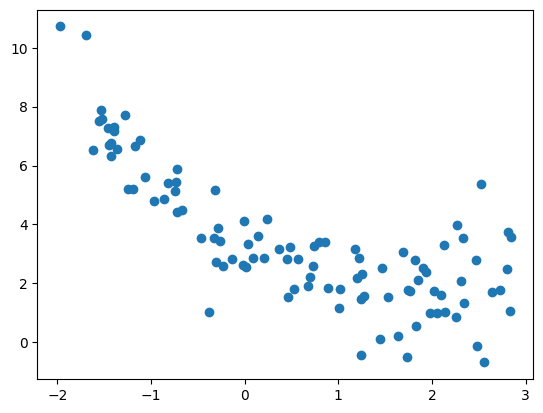

In [70]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

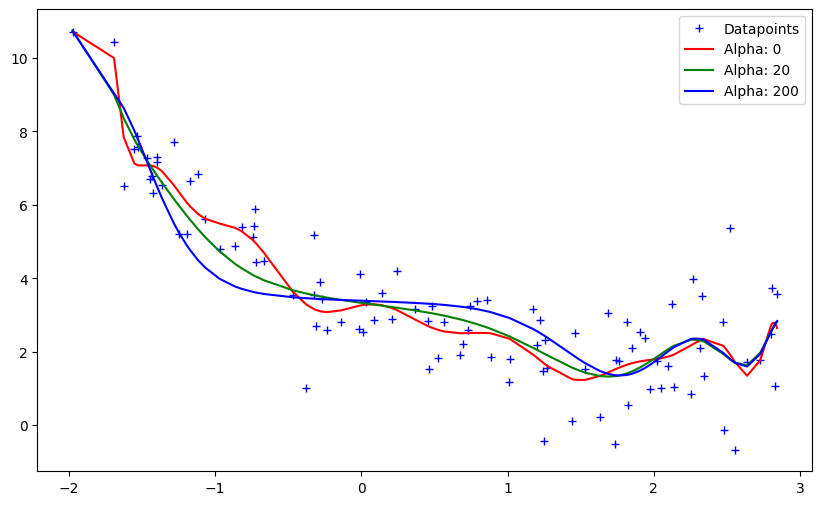

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)
alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()